In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import folium

# Data Setup

In [ ]:
import os

# List all files in the "StormEvents_Details" directory
details_dir = 'data/storms/StormEvents_Details/'
details_files = [os.path.join(details_dir, file) for file in os.listdir(details_dir) if file.endswith('.csv')]

# Read and concatenate all details data
details_dfs = [pd.read_csv(file) for file in details_files]
all_details = pd.concat(details_dfs, ignore_index=True)

# List all files in the "StormEvents_Fatalities" directory
fatalities_dir = 'data/storms/StormEvents_Fatalities/'
fatalities_files = [os.path.join(fatalities_dir, file) for file in os.listdir(fatalities_dir) if file.endswith('.csv')]
all_fatalities = pd.concat([pd.read_csv(file) for file in fatalities_files], ignore_index=True)

/var/folders/pw/1zr89f35601_sz5xftx99jv00000gn/T/ipykernel_63914/2500950096.py:8: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  details_dfs = [pd.read_csv(file) for file in details_files]
/var/folders/pw/1zr89f35601_sz5xftx99jv00000gn/T/ipykernel_63914/2500950096.py:8: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  details_dfs = [pd.read_csv(file) for file in details_files]
/var/folders/pw/1zr89f35601_sz5xftx99jv00000gn/T/ipykernel_63914/2500950096.py:8: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  details_dfs = [pd.read_csv(file) for file in details_files]
/var/folders/pw/1zr89f35601_sz5xftx99jv00000gn/T/ipykernel_63914/2500950096.py:8: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  details_dfs = [pd.read_csv(file) for file in details_files]
/var/fol

# Data Exploration

The goal of this analysis and these graphs is to get familiar with the datasets and features

In [3]:
# Filter the storms in Texas
storms_texas = all_details[all_details['STATE'] == 'TEXAS']

# Get the event IDs for storms in Texas
texas_event_ids = storms_texas['EVENT_ID'].unique()

# Filter the fatalities for those event IDs
fatalities_texas = all_fatalities[all_fatalities['EVENT_ID'].isin(texas_event_ids)]

# Display the dataframes
storms_texas.head()
fatalities_texas.head()

,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
15,200906,26,0,5513,182389,I,06/26/2009 00:00:00,77.0,F,Permanent Home,999999.0
16,200906,24,0,5516,183137,D,06/24/2009 00:00:00,37.0,M,Outside/Open Areas,999999.0
17,200906,10,0,5517,183188,I,06/10/2009 00:00:00,39.0,M,Outside/Open Areas,999999.0
18,200906,10,0,5518,183188,I,06/10/2009 00:00:00,36.0,F,Outside/Open Areas,999999.0
38,200901,28,0,4474,143588,I,01/28/2009 00:00:00,NaN,M,Vehicle/Towed Trailer,999999.0


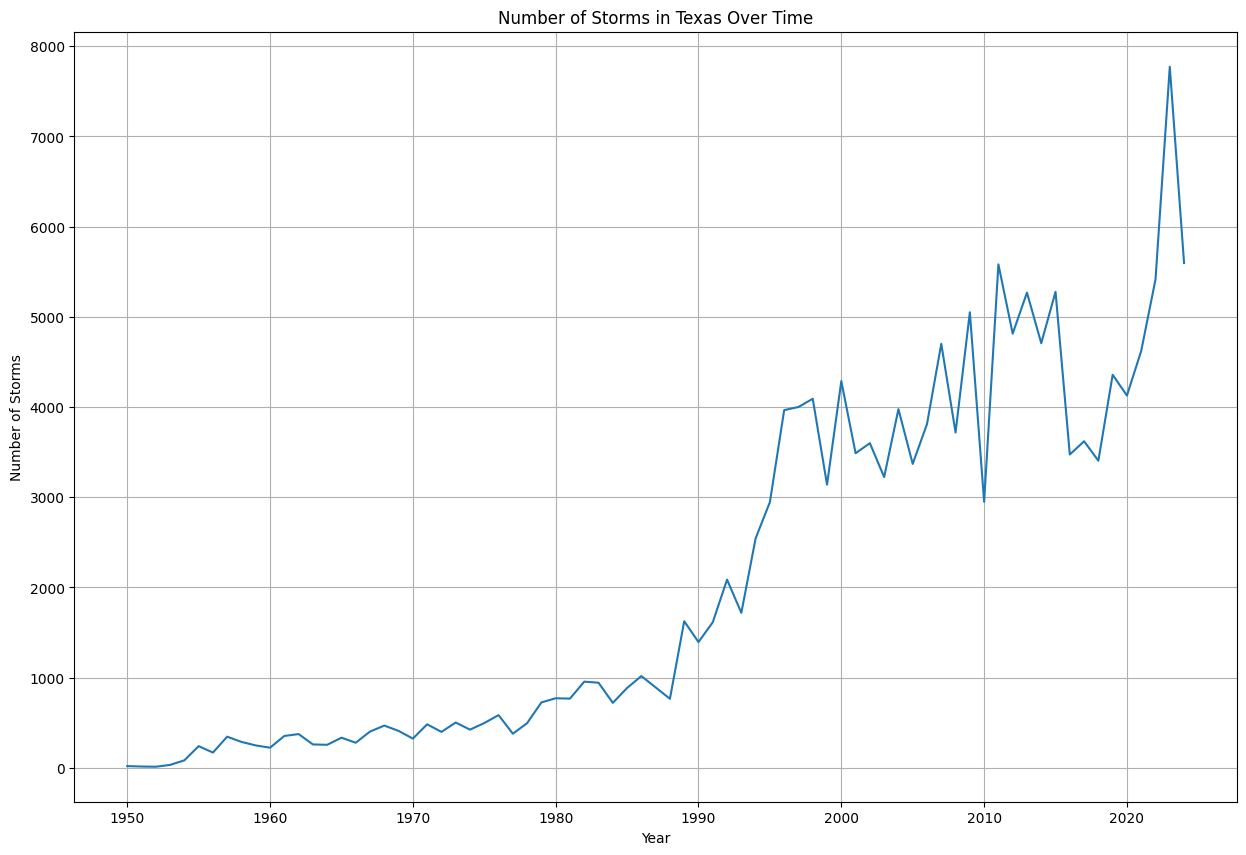

In [4]:
# Group the storms in Texas by year and count the number of storms
storms_texas_by_year = storms_texas.groupby('YEAR').size()

# Plot the data
plt.figure(figsize=(15, 10))
storms_texas_by_year.plot(kind='line')
plt.title('Number of Storms in Texas Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(True)
plt.show()

In [5]:
# List all features in the texas storms dataframe
texas_features = storms_texas.columns
texas_features

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

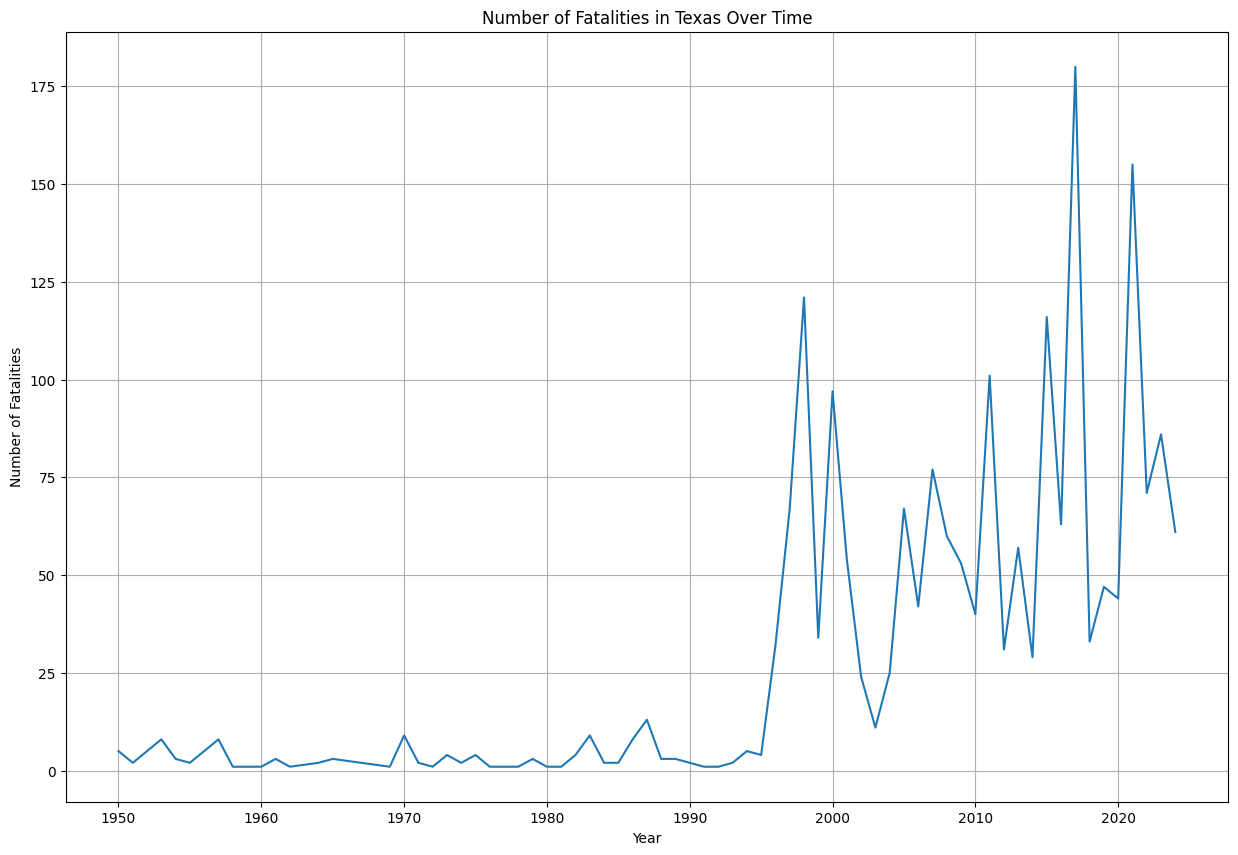

In [6]:
# Group the fatalities in Texas by year and count the number of fatalities
fatalities_texas_by_year = fatalities_texas.groupby(fatalities_texas['FAT_YEARMONTH'] // 100).size()

# Plot the data
plt.figure(figsize=(15, 10))
fatalities_texas_by_year.plot(kind='line')
plt.title('Number of Fatalities in Texas Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

In [7]:
storms_texas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BEGIN_YEARMONTH,156719.0,2.005480e+05,1.440120e+03,195001.0000,199712.00000,2.008040e+05,2.016090e+05,2.024110e+05
BEGIN_DAY,156719.0,1.427413e+01,9.481337e+00,1.0000,5.00000,1.400000e+01,2.300000e+01,3.100000e+01
BEGIN_TIME,156719.0,1.295483e+03,7.402926e+02,0.0000,714.00000,1.547000e+03,1.850000e+03,2.359000e+03
END_YEARMONTH,156719.0,2.005480e+05,1.440120e+03,195001.0000,199712.00000,2.008040e+05,2.016090e+05,2.024110e+05
END_DAY,156719.0,1.738170e+01,9.436584e+00,1.0000,9.00000,1.700000e+01,2.600000e+01,3.100000e+01
END_TIME,156719.0,1.600395e+03,6.249231e+02,0.0000,1338.00000,1.740000e+03,2.027000e+03,2.359000e+03
EPISODE_ID,125422.0,5.468391e+05,6.965343e+05,9.0000,78339.00000,1.564200e+05,1.131241e+06,2.414789e+06
EVENT_ID,156719.0,3.780282e+06,3.791369e+06,8.0000,571008.50000,1.141054e+06,5.614442e+06,1.035610e+07
STATE_FIPS,156719.0,4.800000e+01,0.000000e+00,48.0000,48.00000,4.800000e+01,4.800000e+01,4.800000e+01
YEAR,156719.0,2.005422e+03,1.440115e+01,1950.0000,1997.00000,2.008000e+03,2.016000e+03,2.024000e+03


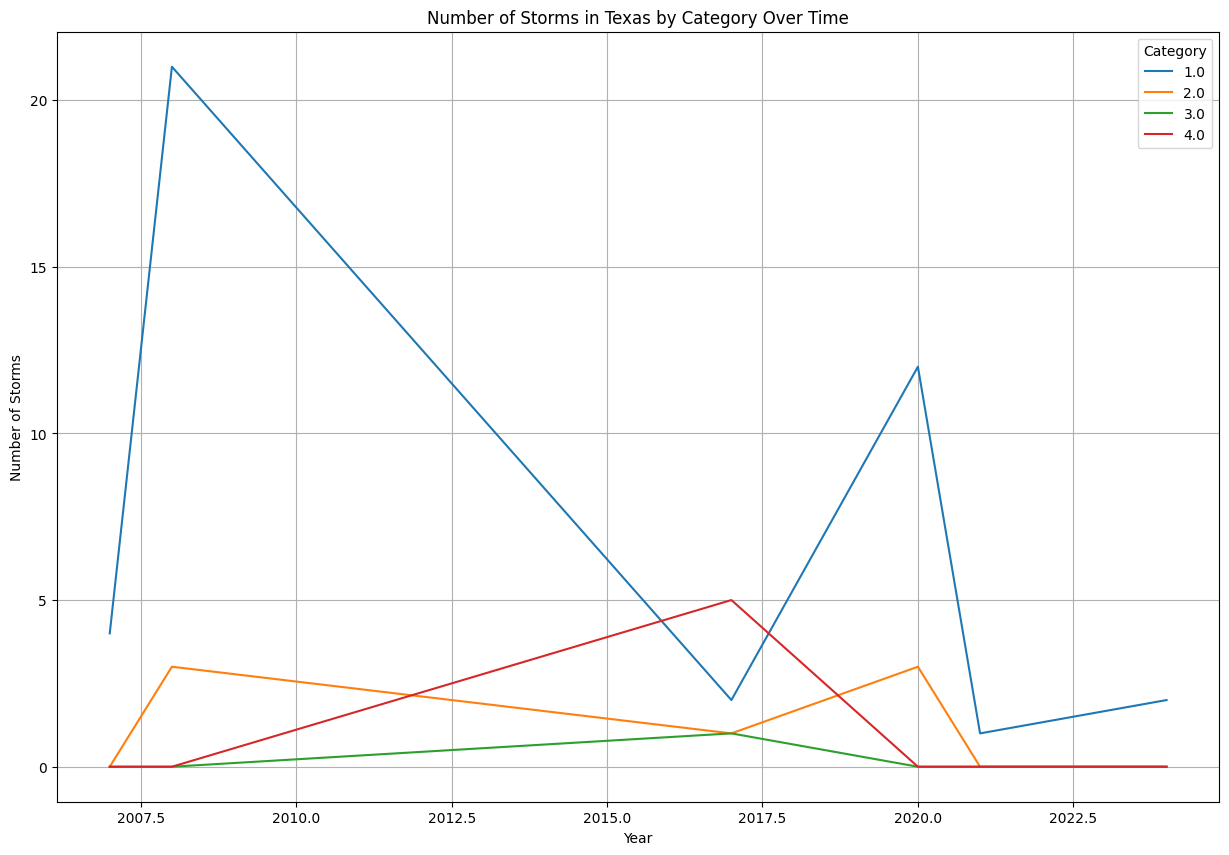

In [8]:
# Group the storms in Texas by year and category, and count the number of storms
storms_texas_by_category = storms_texas.groupby(['YEAR', 'CATEGORY']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(15, 10))
storms_texas_by_category.plot(kind='line', ax=plt.gca())
plt.title('Number of Storms in Texas by Category Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(True)
plt.legend(title='Category')
plt.show()

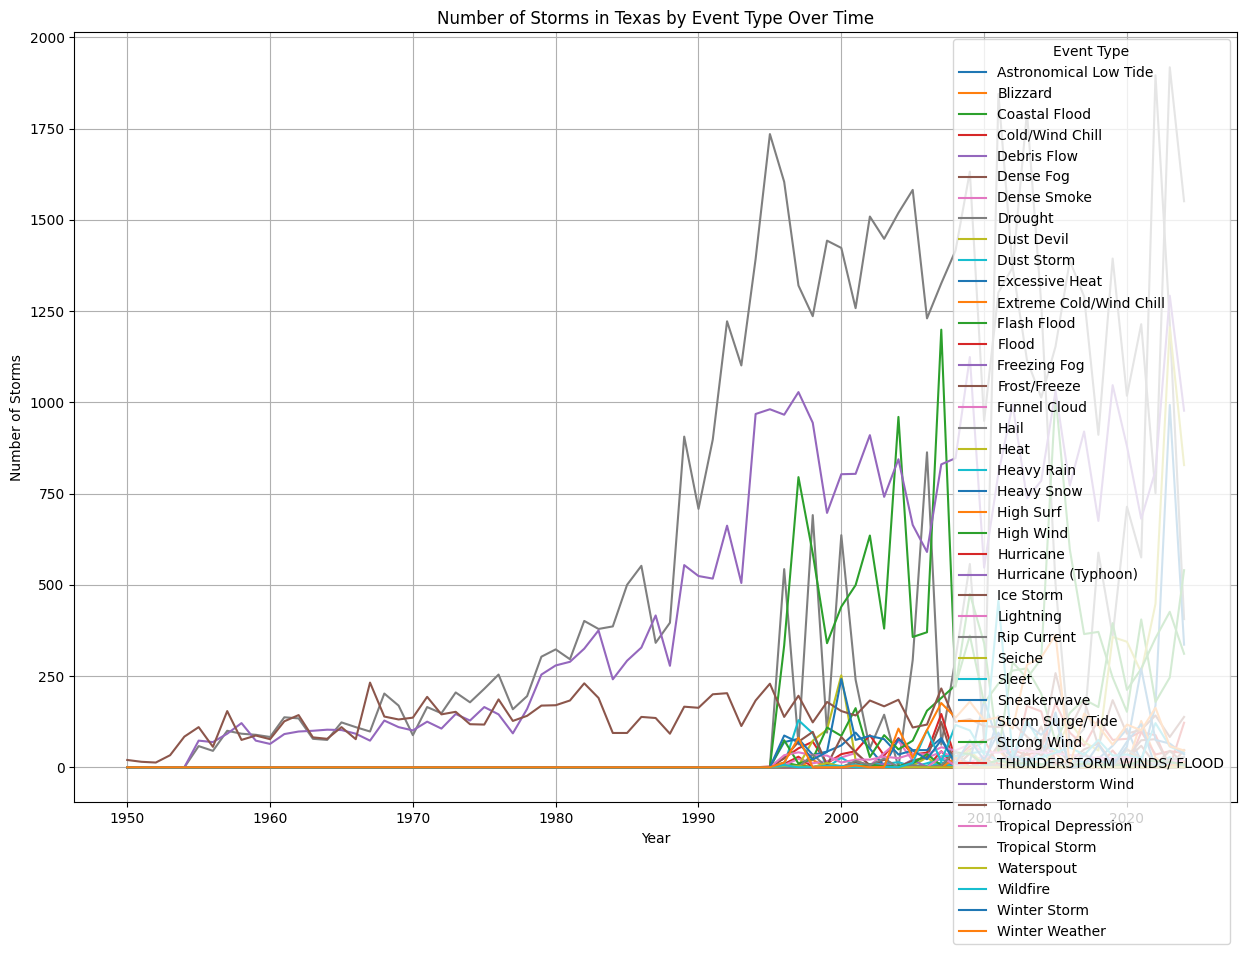

In [9]:
# Group the storms in Texas by year and event type, and count the number of storms
storms_texas_by_event_type = storms_texas.groupby(['YEAR', 'EVENT_TYPE']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(15, 10))
storms_texas_by_event_type.plot(kind='line', ax=plt.gca())
plt.title('Number of Storms in Texas by Event Type Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(True)
plt.legend(title='Event Type')
plt.show()

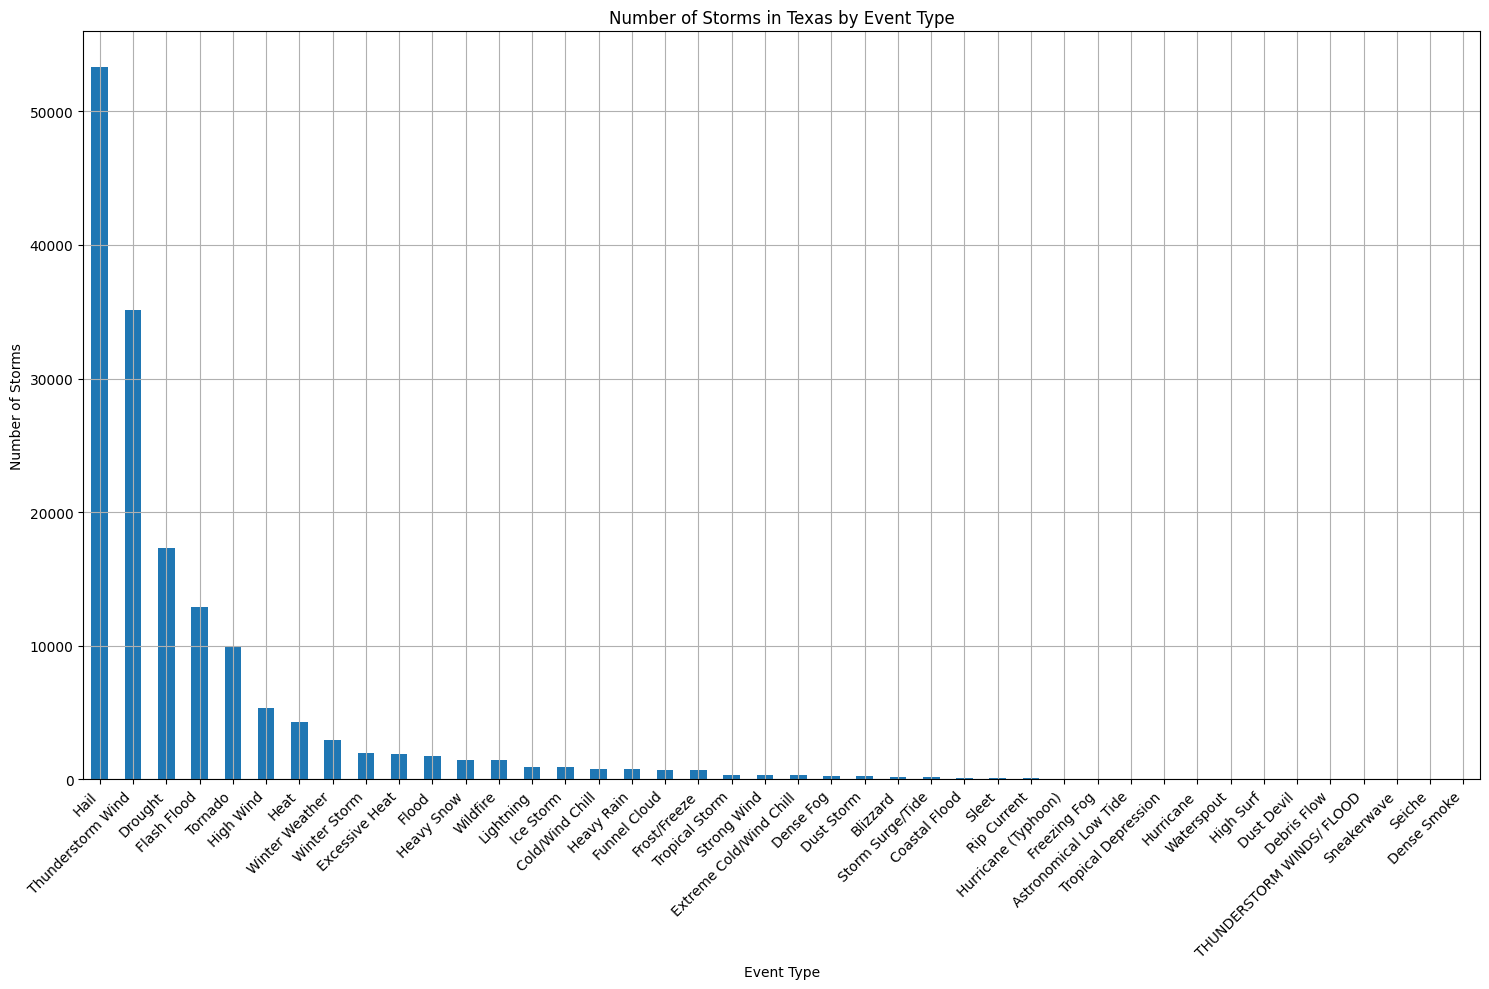

In [10]:
# Sum the number of events for each event type
event_type_counts = storms_texas_by_event_type.sum()

# Sort the counts in descending order
event_type_counts_sorted = event_type_counts.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(15, 10))
event_type_counts_sorted.plot(kind="bar")
plt.title("Number of Storms in Texas by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Number of Storms")
plt.xticks(rotation=45, ha="right")  # Improved readability of labels
plt.grid(True)
plt.tight_layout()  # Ensures labels don't get cut off
plt.show()

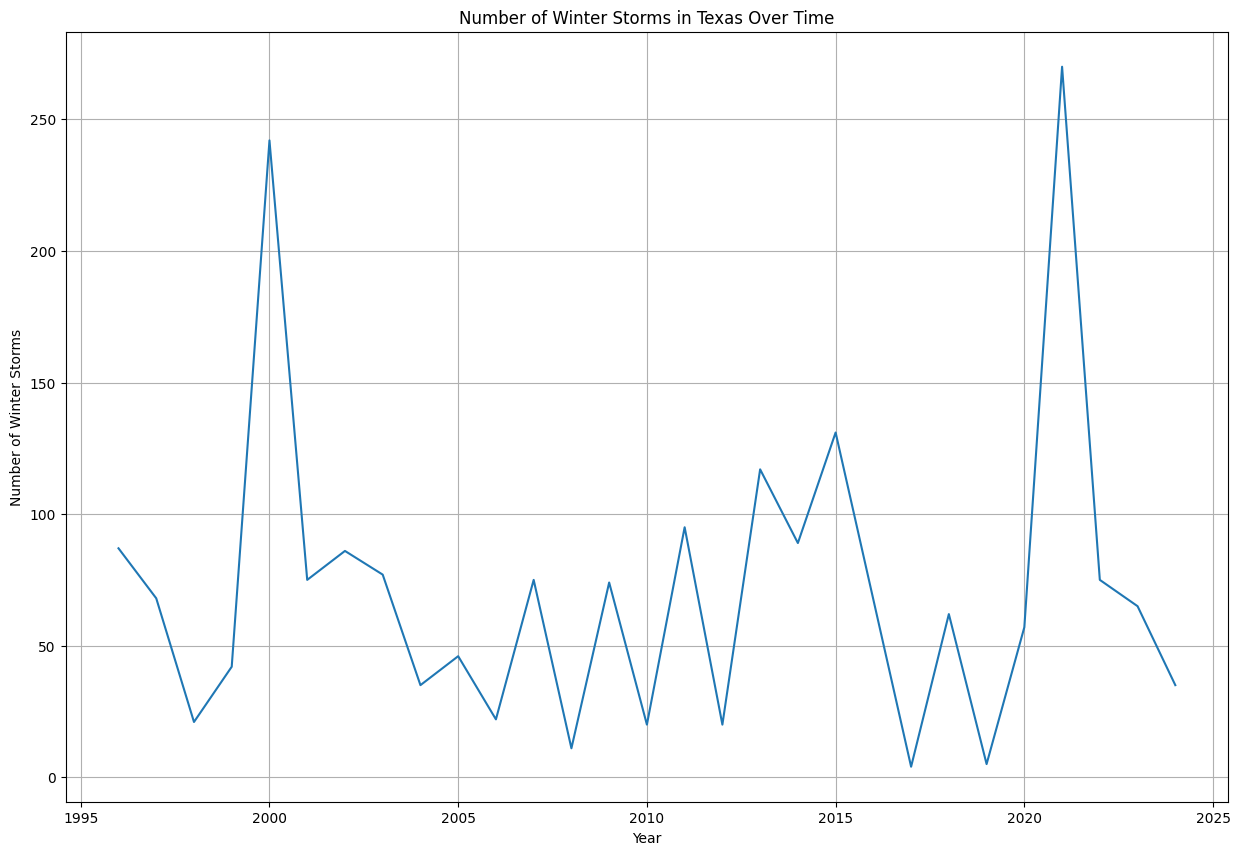

In [11]:
# Filter the storms in Texas for "Winter Storm"
winter_storms_texas = storms_texas[storms_texas['EVENT_TYPE'] == 'Winter Storm']

# Group the winter storms in Texas by year and count the number of storms
winter_storms_texas_by_year = winter_storms_texas.groupby('YEAR').size()

# Plot the data
plt.figure(figsize=(15, 10))
winter_storms_texas_by_year.plot(kind='line')
plt.title('Number of Winter Storms in Texas Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Winter Storms')
plt.grid(True)
plt.show()

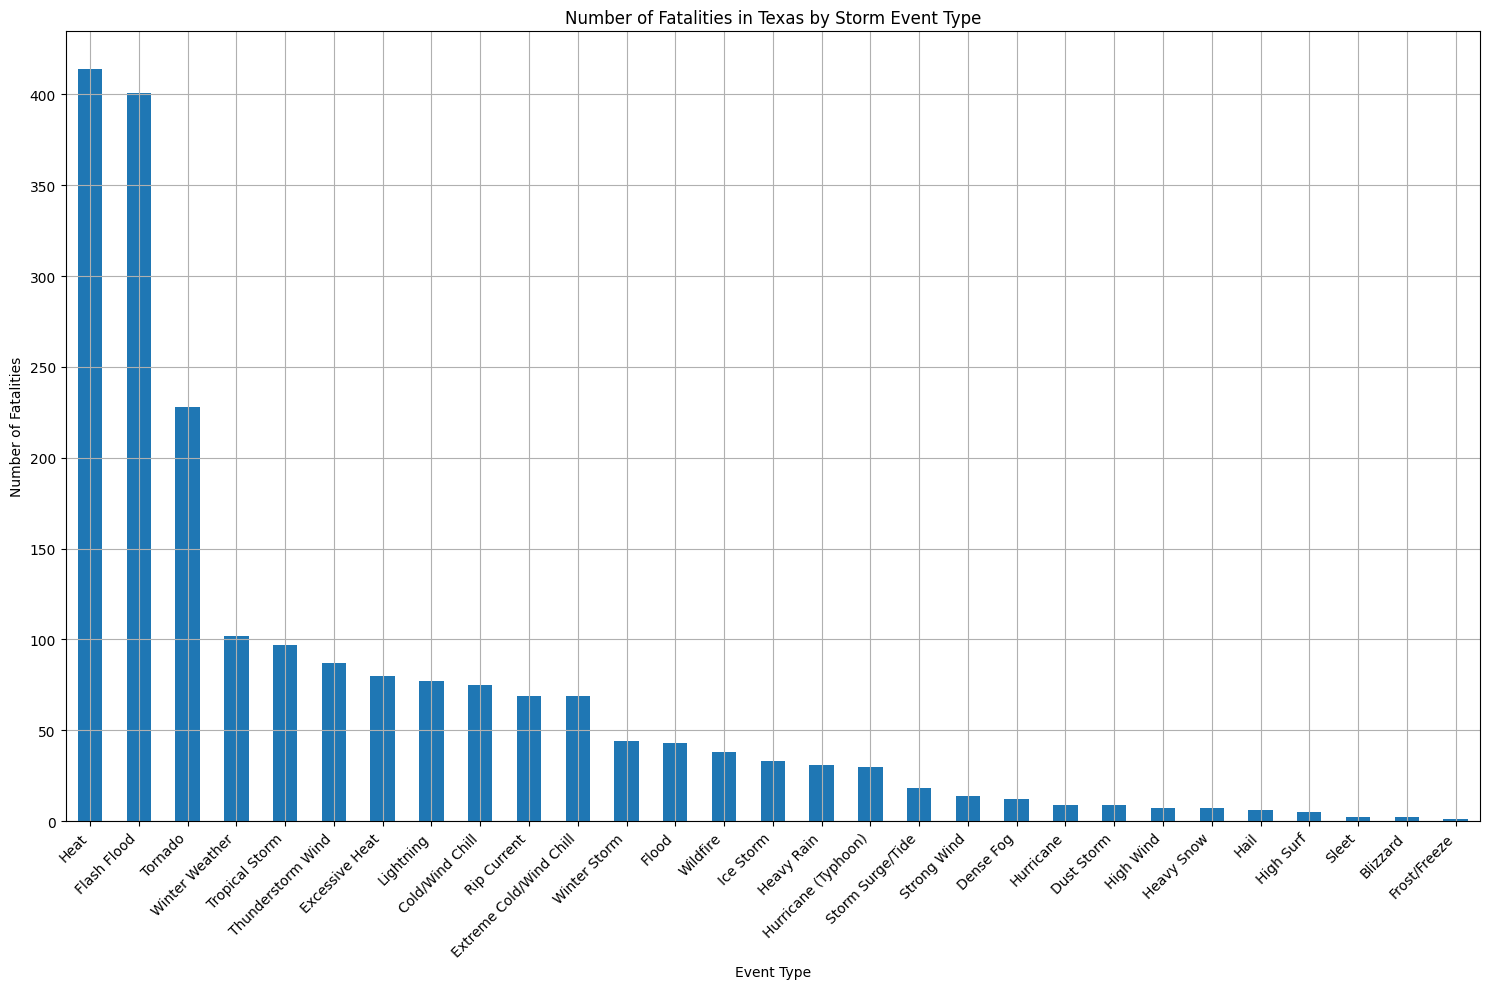

In [12]:
# Merge fatalities with storms data to get consistent event types
merged_fatalities = pd.merge(
    fatalities_texas,
    storms_texas[["EVENT_ID", "EVENT_TYPE"]],
    on="EVENT_ID",
    how="left",
)

# Group the fatalities by event type from storms data and count
fatalities_by_event_type = (
    merged_fatalities.groupby("EVENT_TYPE").size().sort_values(ascending=False)
)

# Plot the data
plt.figure(figsize=(15, 10))
fatalities_by_event_type.plot(kind="bar")
plt.title("Number of Fatalities in Texas by Storm Event Type")
plt.xlabel("Event Type")
plt.ylabel("Number of Fatalities")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

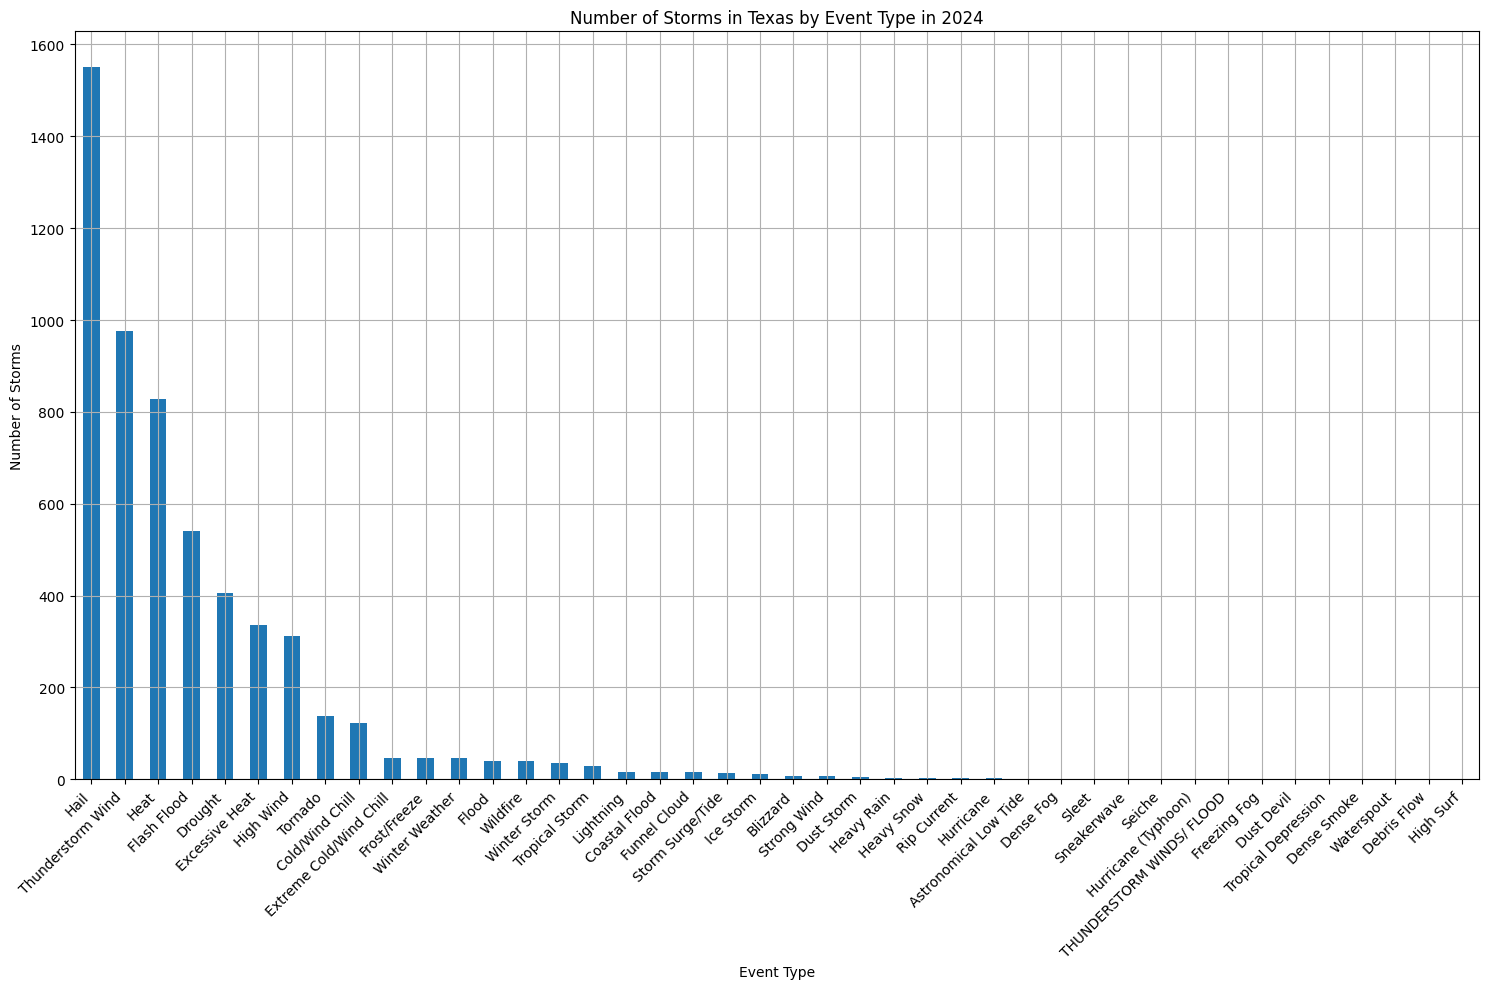

In [13]:
# Filter the data for the year 2024
storms_2024_event_types = storms_texas_by_event_type.loc[2024]

# Sort the data by frequency in descending order
storms_2024_event_types_sorted = storms_2024_event_types.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(15, 10))
storms_2024_event_types_sorted.plot(kind="bar")
plt.title("Number of Storms in Texas by Event Type in 2024")
plt.xlabel("Event Type")
plt.ylabel("Number of Storms")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Filter storms in Texas for the second half of 2024
storms_2024_h2 = storms_texas[(storms_texas['YEAR'] == 2024) & (storms_texas['BEGIN_YEARMONTH'] >= 202407)]

# Get unique event types for coloring
unique_events = storms_2024_h2['EVENT_TYPE'].unique()

# Create a map centered on Texas
map_texas = folium.Map(location=[31.5, -99.5], zoom_start=6)

# Add storm events as markers
for idx, storm in storms_2024_h2.iterrows():
    # Only plot if we have valid coordinates
    if pd.notna(storm['BEGIN_LAT']) and pd.notna(storm['BEGIN_LON']):
        # Create a color map using event types
        color = plt.cm.tab20(storms_2024_h2['EVENT_TYPE'].astype('category').cat.codes[idx] / len(unique_events))
        # Convert RGBA to hex color
        hex_color = '#{:02x}{:02x}{:02x}'.format(
            int(color[0] * 255), 
            int(color[1] * 255), 
            int(color[2] * 255)
        )
        
        # Create detailed popup content
        popup_content = f"""
        <b>Event Type:</b> {storm['EVENT_TYPE']}<br>
        <b>Date:</b> {storm['BEGIN_DATE_TIME']}<br>
        <b>Location:</b> {storm['CZ_NAME']} County<br>
        <b>Property Damage:</b> {storm['DAMAGE_PROPERTY']}<br>
        <b>Injuries:</b> {storm['INJURIES_DIRECT']} direct, {storm['INJURIES_INDIRECT']} indirect<br>
        <b>Deaths:</b> {storm['DEATHS_DIRECT']} direct, {storm['DEATHS_INDIRECT']} indirect<br>
        <b>Event Details:</b> {storm['EVENT_NARRATIVE'] if pd.notna(storm['EVENT_NARRATIVE']) else 'No details available'}<br>
        """
        
        folium.CircleMarker(
            location=[storm['BEGIN_LAT'], storm['BEGIN_LON']],
            radius=5,
            popup=folium.Popup(popup_content, max_width=300),
            color=hex_color,
            fill=True,
            fillColor=hex_color
        ).add_to(map_texas)

# Create a collapsible legend with pagination
legend_html = '''
<div id="legend" style="position: fixed; bottom: 50px; right: 50px; width: 200px; 
    background-color: white; border: 2px solid grey; z-index: 1000;">
<div style="margin: 5px;">
    <button onclick="toggleLegend()" style="float: right; margin-left: 5px;">▼</button>
    <strong>Event Types</strong>
</div>
<div id="legend-content">
'''

# Create pages of legend items
items_per_page = 10
total_pages = (len(unique_events) + items_per_page - 1) // items_per_page

for page in range(total_pages):
    start_idx = page * items_per_page
    end_idx = min(start_idx + items_per_page, len(unique_events))
    display = 'block' if page == 0 else 'none'
    
    legend_html += f'<div id="page{page}" style="display: {display};">'
    
    for i in range(start_idx, end_idx):
        event = unique_events[i]
        color = plt.cm.tab20(i / len(unique_events))
        hex_color = '#{:02x}{:02x}{:02x}'.format(
            int(color[0] * 255), 
            int(color[1] * 255), 
            int(color[2] * 255)
        )
        legend_html += f'''
        <div style="margin: 5px;">
            <span style="background-color: {hex_color}; display: inline-block; 
                width: 10px; height: 10px;"></span>
            {event}
        </div>
        '''
    
    legend_html += '</div>'

# Add pagination controls at the bottom
legend_html += '''
<div style="margin: 5px; text-align: center; border-top: 1px solid #ccc; padding-top: 5px;">
    <button onclick="prevPage()">◀</button>
    <span id="page-display">Page 1/{}</span>
    <button onclick="nextPage()">▶</button>
</div>
</div>
'''.format(total_pages)

# Add JavaScript for pagination and collapse functionality
legend_html += '''
<script>
var currentPage = 0;
var totalPages = {};
var isCollapsed = false;

function showPage(page) {{
    // Hide all pages
    for (var i = 0; i < totalPages; i++) {{
        document.getElementById('page' + i).style.display = 'none';
    }}
    // Show selected page
    document.getElementById('page' + page).style.display = 'block';
    // Update page display
    document.getElementById('page-display').innerHTML = 'Page ' + (page + 1) + '/' + totalPages;
}}

function nextPage() {{
    currentPage = (currentPage + 1) % totalPages;
    showPage(currentPage);
}}

function prevPage() {{
    currentPage = (currentPage - 1 + totalPages) % totalPages;
    showPage(currentPage);
}}

function toggleLegend() {{
    var content = document.getElementById('legend-content');
    var button = document.querySelector('#legend button');
    if (isCollapsed) {{
        content.style.display = 'block';
        button.innerHTML = '▼';
    }} else {{
        content.style.display = 'none';
        button.innerHTML = '▲';
    }}
    isCollapsed = !isCollapsed;
}}
</script>
</div>
'''.format(total_pages)

map_texas.get_root().html.add_child(folium.Element(legend_html))

map_texas